In [275]:
import warnings

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json
import plotly.express as px
import plotly.graph_objects as go

In [276]:
with open("./results.json", "r") as file:
    result_file = json.loads(file.read())

In [277]:
import re
result_df = pd.json_normalize(result_file)
result_df.rename(columns=lambda c: re.sub(r'^simulation_results.', '', c), inplace=True)
result_df.rename(columns=lambda c: re.sub(r'^simulation_config.', '', c), inplace=True)
result_df.sort_values(by='expected_throughput', ignore_index=True, inplace=True)
result_df

,completed_training_steps,controller,controller_config.reward_function,controller_config.epsilon_start,controller_config.epsilon_end,controller_config.learning_rate,controller_config.gamma,controller_config.memory_size,controller_config.batch_size,controller_config.hidden_layer_size,...,campaign_config.live_testing_frequency,campaign_config.testing_repetitions,max_possible_throughput,expected_throughput,avg_throughput,controller.avg_reward,controller.cum_avg_rewards,controller.losses,controller.epsilons,controller.step_bins
0,10000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,64,...,10000,5,4.666667,0.466667,0.000000,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 10.01001001001001, 20.02002002002002, 30..."
1,400000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,64,...,100000,5,4.666667,0.466667,0.463590,0.034816,"[0.0, 0.0, 0.015421243465366441, 0.02442501403...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 10.01001001001001, 20.02002002002002, 30..."
2,400000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,64,...,100000,5,4.666667,0.466667,0.462762,0.035005,"[0.0, 0.0, 0.010342684729064038, 0.02832723521...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 10.01001001001001, 20.02002002002002, 30..."
3,400000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,64,...,100000,5,4.666667,0.466667,0.449474,0.034981,"[0.0, 0.0, 0.015421243465366441, 0.02442501403...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 10.01001001001001, 20.02002002002002, 30..."
4,400000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,64,...,100000,5,4.666667,0.466667,0.447205,0.035672,"[0.0, 0.0, 0.010342684729064038, 0.02832723521...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 10.01001001001001, 20.02002002002002, 30..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,70000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,64,...,10000,5,4.666667,0.466667,0.457891,0.034883,"[0.0, 0.0, 0.010342684729064038, 0.02832723521...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 10.01001001001001, 20.02002002002002, 30..."
1016,70000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,64,...,10000,5,4.666667,0.466667,0.463465,0.035124,"[0.0, 0.0, 0.010342684729064038, 0.02832723521...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 10.01001001001001, 20.02002002002002, 30..."
1017,70000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,64,...,10000,5,4.666667,0.466667,0.460828,0.035018,"[0.0, 0.0, 0.010342684729064038, 0.02832723521...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 10.01001001001001, 20.02002002002002, 30..."
1018,70000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,64,...,10000,5,4.666667,0.466667,0.459179,0.034414,"[0.0, 0.0, 0.010342684729064038, 0.02832723521...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 10.01001001001001, 20.02002002002002, 30..."


In [278]:
result_df.reset_index(inplace=True, names='campaign_id')
result_df.head()

,campaign_id,completed_training_steps,controller,controller_config.reward_function,controller_config.epsilon_start,controller_config.epsilon_end,controller_config.learning_rate,controller_config.gamma,controller_config.memory_size,controller_config.batch_size,...,campaign_config.live_testing_frequency,campaign_config.testing_repetitions,max_possible_throughput,expected_throughput,avg_throughput,controller.avg_reward,controller.cum_avg_rewards,controller.losses,controller.epsilons,controller.step_bins
0,0,10000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,10000,5,4.666667,0.466667,0.000000,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 10.01001001001001, 20.02002002002002, 30..."
1,1,400000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,100000,5,4.666667,0.466667,0.463590,0.034816,"[0.0, 0.0, 0.015421243465366441, 0.02442501403...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 10.01001001001001, 20.02002002002002, 30..."
2,2,400000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,100000,5,4.666667,0.466667,0.462762,0.035005,"[0.0, 0.0, 0.010342684729064038, 0.02832723521...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 10.01001001001001, 20.02002002002002, 30..."
3,3,400000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,100000,5,4.666667,0.466667,0.449474,0.034981,"[0.0, 0.0, 0.015421243465366441, 0.02442501403...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 10.01001001001001, 20.02002002002002, 30..."
4,4,400000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,100000,5,4.666667,0.466667,0.447205,0.035672,"[0.0, 0.0, 0.010342684729064038, 0.02832723521...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 10.01001001001001, 20.02002002002002, 30..."


In [279]:
import warnings
with warnings.catch_warnings():
    # Converting columns to numeric to improve visibility in graphs
    warnings.simplefilter("ignore")
    result_df['maximum_simulation_steps'] = pd.to_numeric(result_df['completed_training_steps'])
    result_df['mission_size'] = pd.to_numeric(result_df['mission_size'])
    result_df['num_agents'] = pd.to_numeric(result_df['num_agents'])
    result_df['score'] = result_df['avg_throughput'] / result_df['expected_throughput']

In [280]:
result_df = result_df[result_df['campaign_config.training_steps'] == 1_000_000]

In [281]:
q_learning_testing = result_df[~result_df['training']]

# Analysing Q Learning training performance

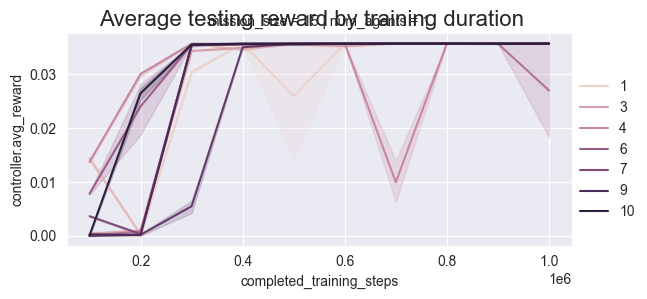

In [282]:
grid = sns.FacetGrid(q_learning_testing, row='mission_size', col='num_agents', aspect=2)
grid.map_dataframe(sns.lineplot, x='completed_training_steps', y='controller.avg_reward', hue='repetitions')

grid.add_legend()

grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle('Average testing reward by training duration', fontsize=16)

plt.show()

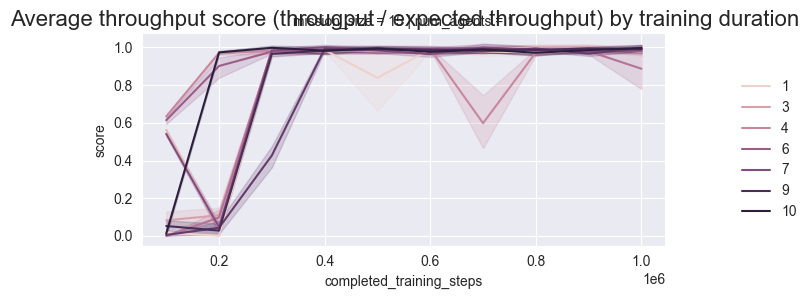

In [283]:
grid = sns.FacetGrid(q_learning_testing, row='mission_size', col='num_agents', aspect=2)
grid.map_dataframe(sns.lineplot, x='completed_training_steps', y='score', hue='repetitions')

grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle('Average throughput score (througput / expected throughput) by training duration', fontsize=16)

grid.add_legend()

plt.show()

In [284]:
q_learning_training = result_df[result_df['training']]

In [285]:
q_learning_training_exploded = q_learning_training.explode(['controller.cum_avg_rewards', 'controller.losses', 'controller.epsilons', 'controller.step_bins'])
q_learning_training_exploded.reset_index(names='step', inplace=True)
q_learning_training_exploded

,step,campaign_id,completed_training_steps,controller,controller_config.reward_function,controller_config.epsilon_start,controller_config.epsilon_end,controller_config.learning_rate,controller_config.gamma,controller_config.memory_size,...,max_possible_throughput,expected_throughput,avg_throughput,controller.avg_reward,controller.cum_avg_rewards,controller.losses,controller.epsilons,controller.step_bins,maximum_simulation_steps,score
0,324,324,1000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,...,4.666667,0.466667,0.468252,0.022029,0.005832,0.000459,0.998846,0.0,1000000,1.003397
1,324,324,1000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,...,4.666667,0.466667,0.468252,0.022029,0.004737,0.000218,0.996547,1001.001001,1000000,1.003397
2,324,324,1000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,...,4.666667,0.466667,0.468252,0.022029,0.00457,0.000198,0.994252,2002.002002,1000000,1.003397
3,324,324,1000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,...,4.666667,0.466667,0.468252,0.022029,0.00422,0.000136,0.991963,3003.003003,1000000,1.003397
4,324,324,1000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,...,4.666667,0.466667,0.468252,0.022029,0.003538,0.000128,0.98968,4004.004004,1000000,1.003397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,1019,1019,1000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,...,4.666667,0.466667,0.463716,0.022560,0.022518,0.0,0.101043,994994.994995,1000000,0.993678
9986,1019,1019,1000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,...,4.666667,0.466667,0.463716,0.022560,0.022527,0.0,0.10081,995995.995996,1000000,0.993678
9987,1019,1019,1000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,...,4.666667,0.466667,0.463716,0.022560,0.022536,0.0,0.100578,996996.996997,1000000,0.993678
9988,1019,1019,1000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,...,4.666667,0.466667,0.463716,0.022560,0.022546,0.0,0.100346,997997.997998,1000000,0.993678


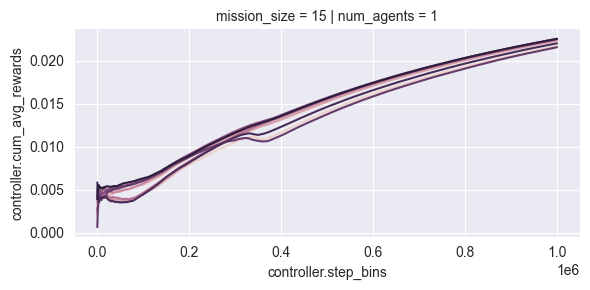

In [286]:
grid = sns.FacetGrid(q_learning_training_exploded, row='mission_size', col='num_agents', aspect=2)
grid.map_dataframe(sns.lineplot, x='controller.step_bins', y='controller.cum_avg_rewards', hue='repetitions')

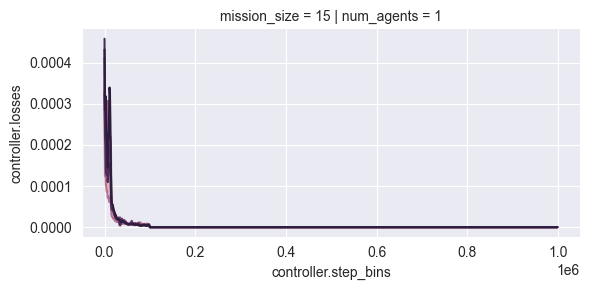

In [287]:
grid = sns.FacetGrid(q_learning_training_exploded, row='mission_size', col='num_agents', aspect=2)
grid.map_dataframe(sns.lineplot, x='controller.step_bins', y='controller.losses', hue='repetitions')

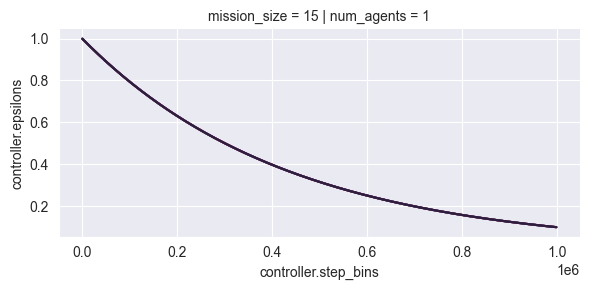

In [288]:
grid = sns.FacetGrid(q_learning_training_exploded, row='mission_size', col='num_agents', aspect=2)
grid.map_dataframe(sns.lineplot, x='controller.step_bins', y='controller.epsilons', hue='repetitions')